Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [23]:
# cell for imports. All imports must go here.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [24]:
file_path = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(file_path)
print("Data information")
df.info()

Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
print("First five rows")
df.head()

First five rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

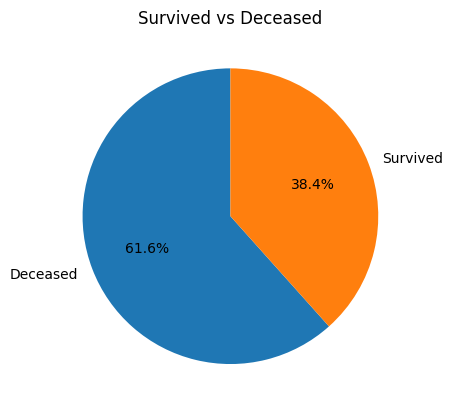

In [26]:
surv_counts = df["Survived"].value_counts().sort_index()
labels = ["Deceased", "Survived"]

plt.figure()
plt.pie(surv_counts, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Survived vs Deceased")
plt.show()

Схема показує, що близько двох третин пасажирів загинули, а трохи більше третини вижили

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


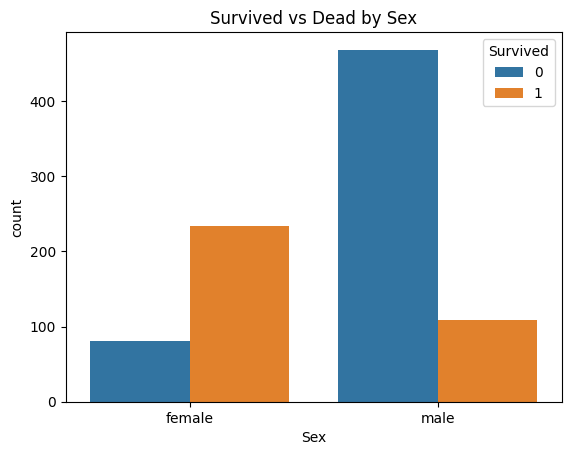

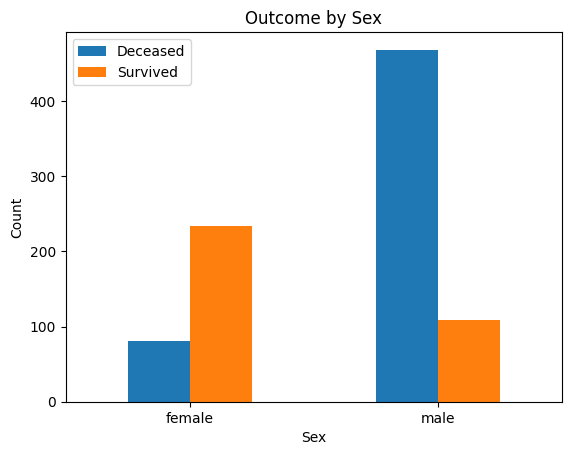

In [27]:
by_sex = df.groupby(["Sex", "Survived"], as_index=False).size()
pivot = by_sex.pivot(index="Sex", columns="Survived", values="size")

pivot.plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Outcome by Sex")
plt.xticks(rotation=0)
plt.legend(["Deceased", "Survived"])
plt.show()

Серед жінок частка тих, хто вижив, значно вища, ніж серед чоловіків

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

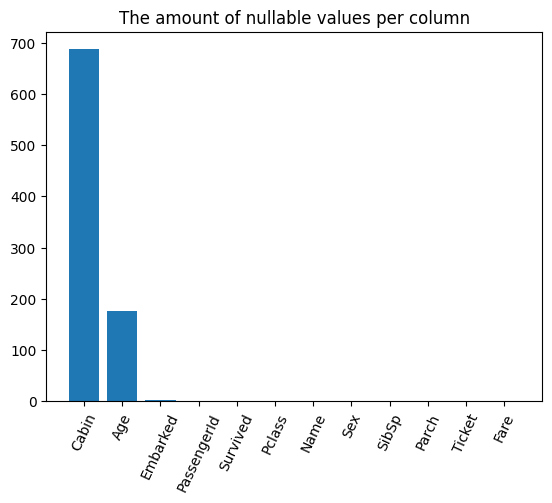

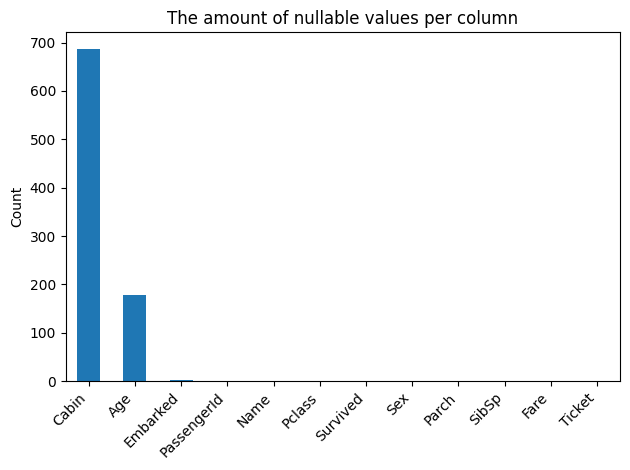

In [28]:
missing = df.isna().sum().sort_values(ascending=False)
plt.figure()
missing.plot(kind="bar")
plt.title("The amount of nullable values per column")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Найбільше пропусків у стовпці Cabin, потім Ageб інші майже повні

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

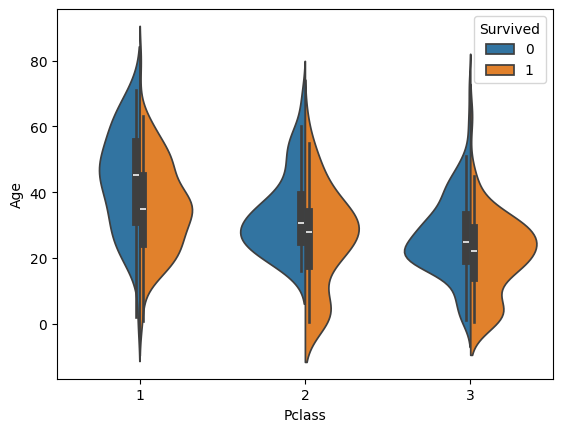

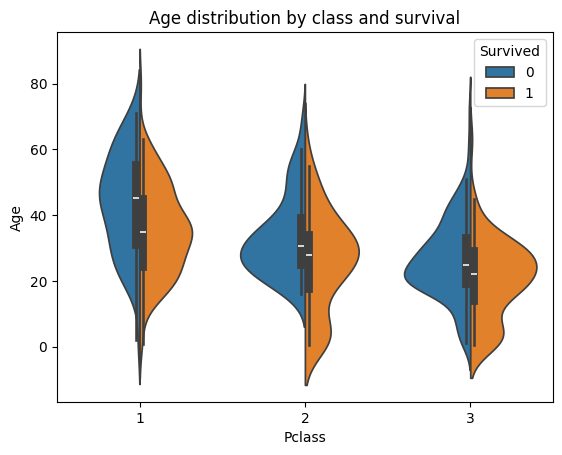

In [29]:
plt.figure()
sns.violinplot(data=df, x="Pclass", y="Age", hue="Survived", split=True)
plt.title("Age distribution by class and survival")
plt.show()

Пасажири першого класу виживали найчастіше, третього — найрідше

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


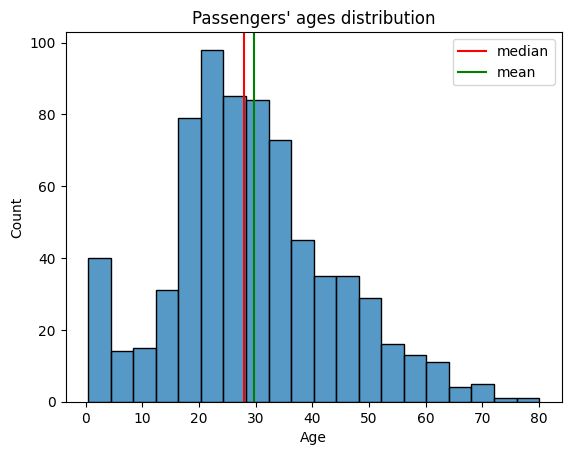

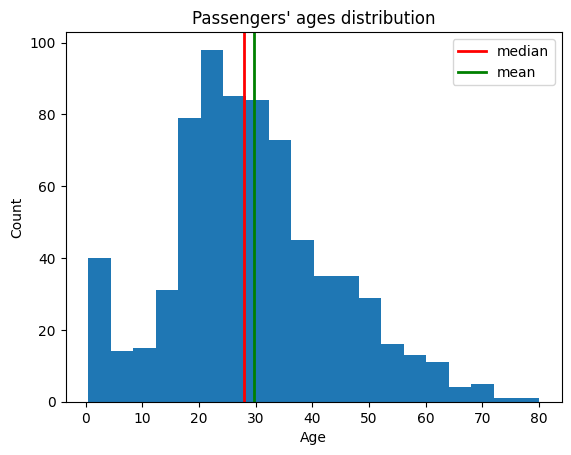

In [30]:
plt.figure()
ages = df["Age"].dropna()
plt.hist(ages, bins=20)
median_age = ages.median()
mean_age = ages.mean()
plt.axvline(median_age, color="red", linewidth=2, label="median")
plt.axvline(mean_age, color="green", linewidth=2, label="mean")
plt.title("Passengers' ages distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

Більшість пасажирів — у віці 20‑40 років; дітей та літніх значно менше.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи впливає розмір родини — сам, невелика (1‑3 родичі) чи велика (4+ родичів) — на шанс пасажира вижити?

<ipython-input-31-0fe4513c3909>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fam = df.groupby(["FamilyCat", "Survived"], as_index=False).size()


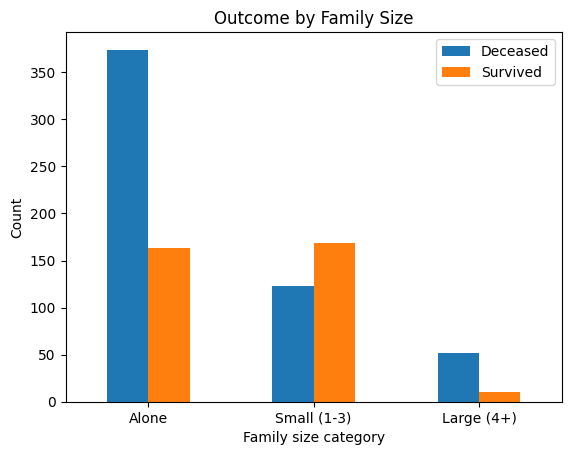

In [31]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df["FamilyCat"] = pd.cut(
    df["FamilySize"],
    bins=[-1, 0, 3, np.inf],
    labels=["Alone", "Small (1‑3)", "Large (4+)"]
)

fam = df.groupby(["FamilyCat", "Survived"], as_index=False).size()
pivot_fam = fam.pivot(index="FamilyCat", columns="Survived", values="size")

pivot_fam.plot(kind="bar")
plt.xlabel("Family size category")
plt.ylabel("Count")
plt.title("Outcome by Family Size")
plt.xticks(rotation=0)
plt.legend(["Deceased", "Survived"])
plt.show()

Пасажири з невеликими сім'ями виживали краще за тих, хто був сам чи у великих групах

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

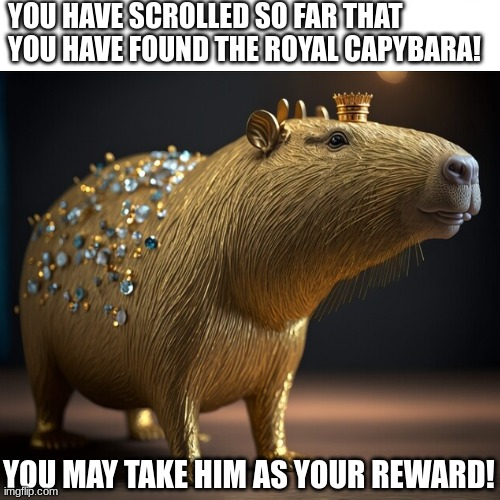